In [ ]:
! pip install folium
import folium
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

!mkdir -p '/content/drive/MyDrive/Omdena/Sudan/EDA/demographics/'
%cd '/content/drive/MyDrive/Omdena/Sudan/EDA/demographics/'

Mounted at /content/drive
/content/drive/MyDrive/Omdena/Sudan/EDA/demographics


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Omdena/Sudan/EDA/demographics/population-by-cities-data.csv")

In [ ]:
df.head()

,city,country,pop2024,latitude,longitude
0,Khartoum,Sudan,1974647,15.5518,32.5324
1,Omdurman,Sudan,1200000,15.6445,32.4777
2,Nyala,Sudan,565734,12.0489,24.8807
3,Port Sudan,Sudan,489725,19.6175,37.2164
4,Kassala,Sudan,401477,15.4510,36.4000


In [ ]:
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=2)

for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=row['pop2024'] / 1000000,
        color='blue',
        fill=True,
        fill_color=f"#{colors[i, :-1].astype(int).dot([1 << 16, 1 << 8, 1]):06x}",
        fill_opacity=0.6,
        popup=f"{row['city']}: {row['pop2024']} people"
    ).add_to(m)
m

<ipython-input-18-dcb973a21222>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='city', y='pop2024', data=city_g, palette='Set3')


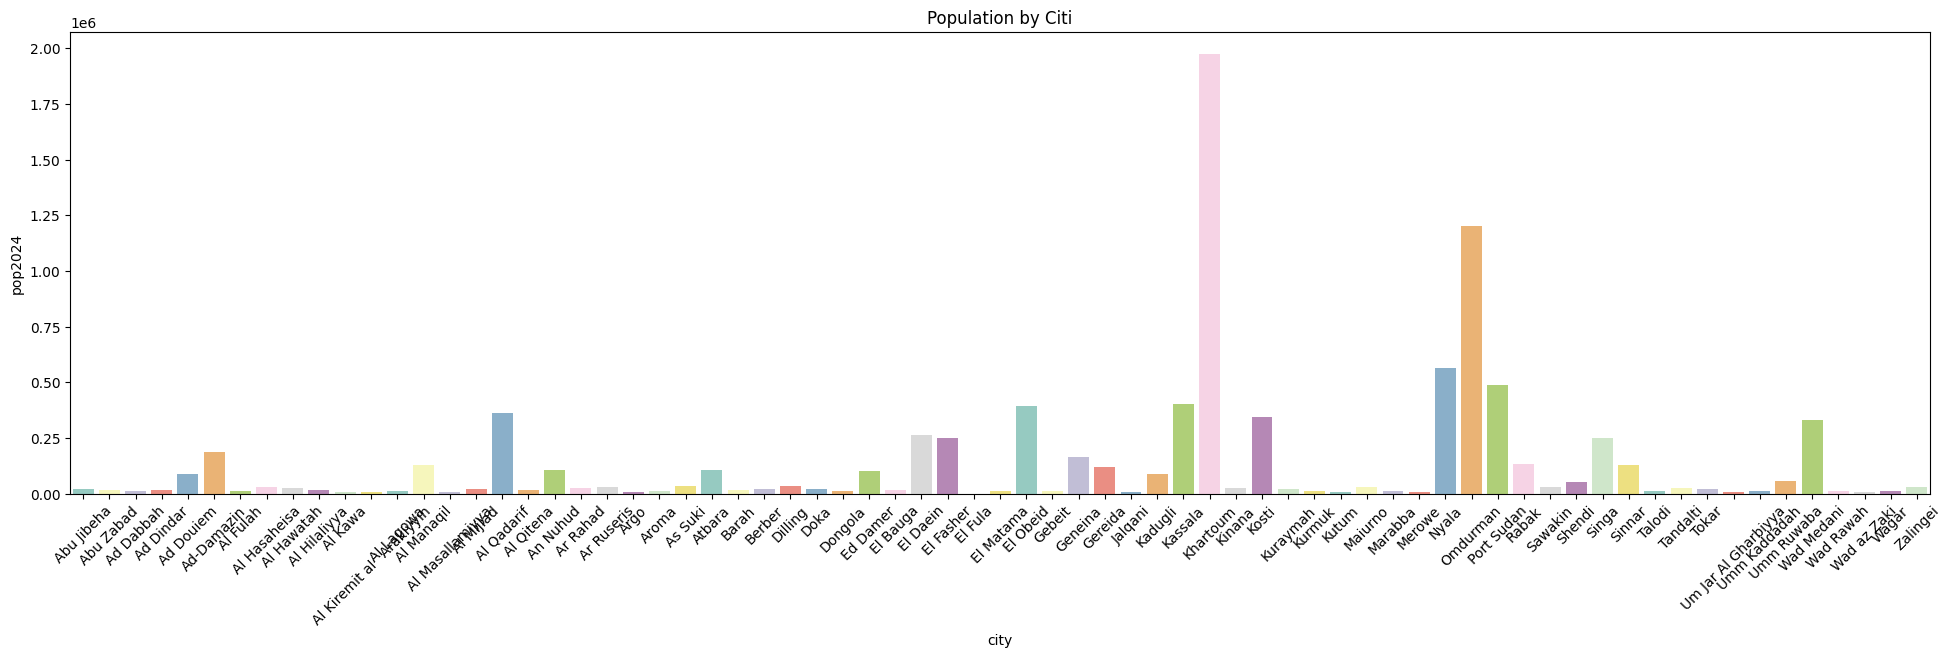

In [18]:
city_g = df.groupby('city')['pop2024'].sum().reset_index()

plt.figure(figsize=(24, 6))
sns.barplot(x='city', y='pop2024', data=city_g, palette='Set3')
plt.title('Population by Citi')
plt.xticks(rotation=45)
plt.show()

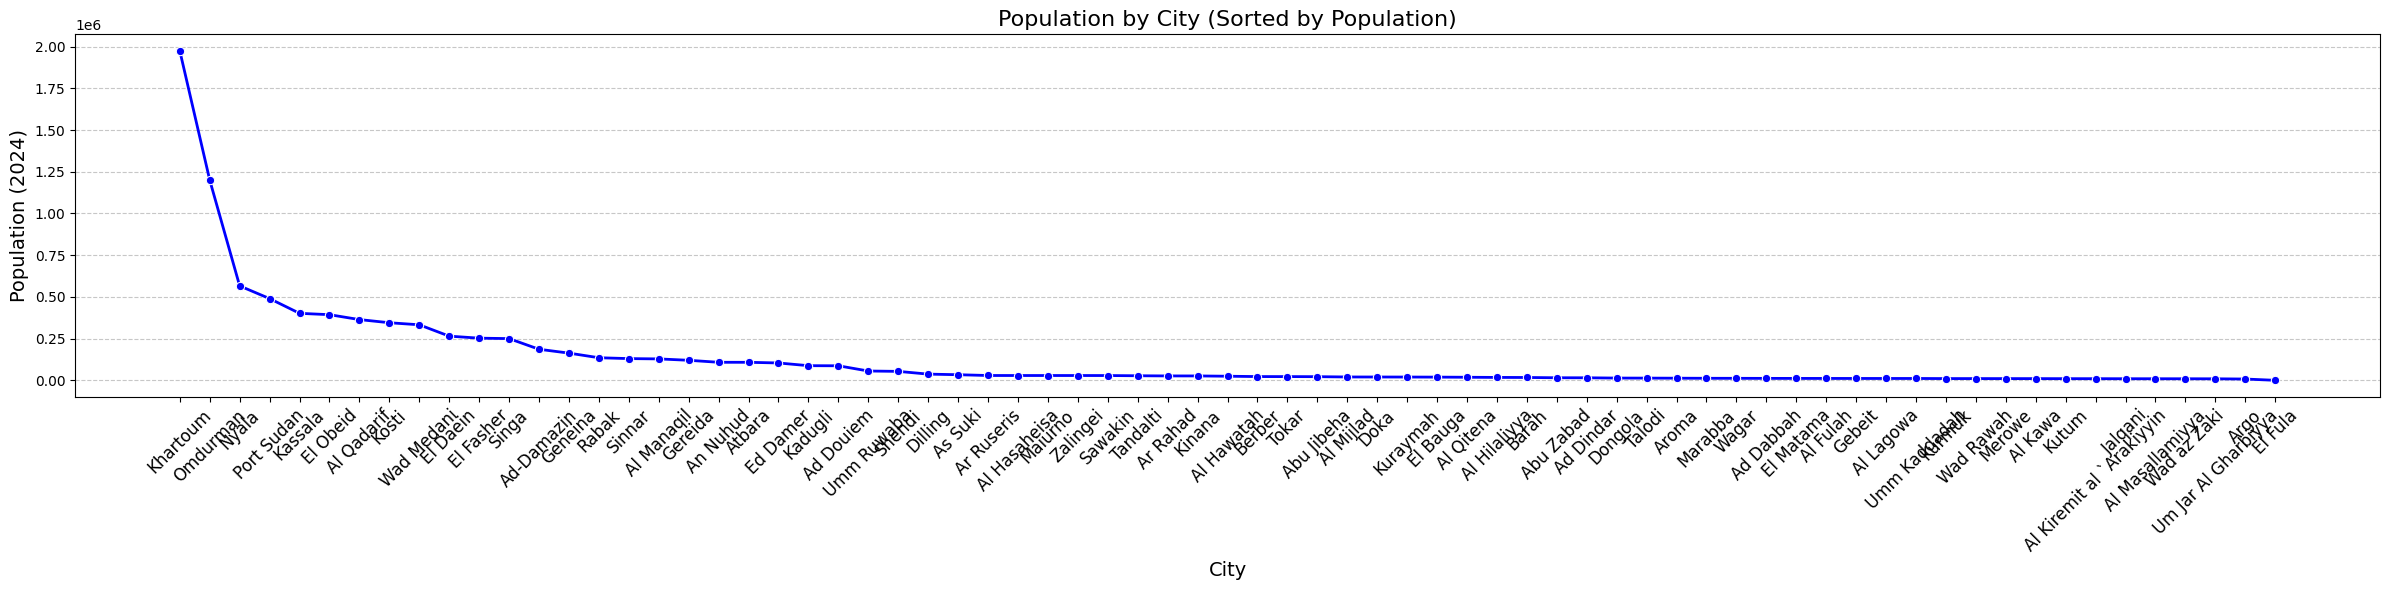

In [19]:
citi_sorted = city_g.sort_values('pop2024', ascending=False)

plt.figure(figsize=(24, 6))
sns.lineplot(
    x='city',
    y='pop2024',
    data=citi_sorted,
    marker='o',
    color='blue',
    linewidth=2
)
plt.title('Population by City (Sorted by Population)', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Population (2024)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()